# **Top 50 common words, without prepositions, adverbs and pronouns, weighted by engagement**

#### by Francielle Kelner


In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive mount
drive.mount('/content/drive')

# Files paths
file_path_concorrentes = '/content/drive/My Drive/Setp1/Step2/tablename.xlsx'

# Loading
df = pd.read_excel(file_path_concorrentes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#libraries

#!pip install adjustText
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import re
from collections import Counter, defaultdict
import plotly.express as px


<ipython-input-57-19464b69bb0e>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



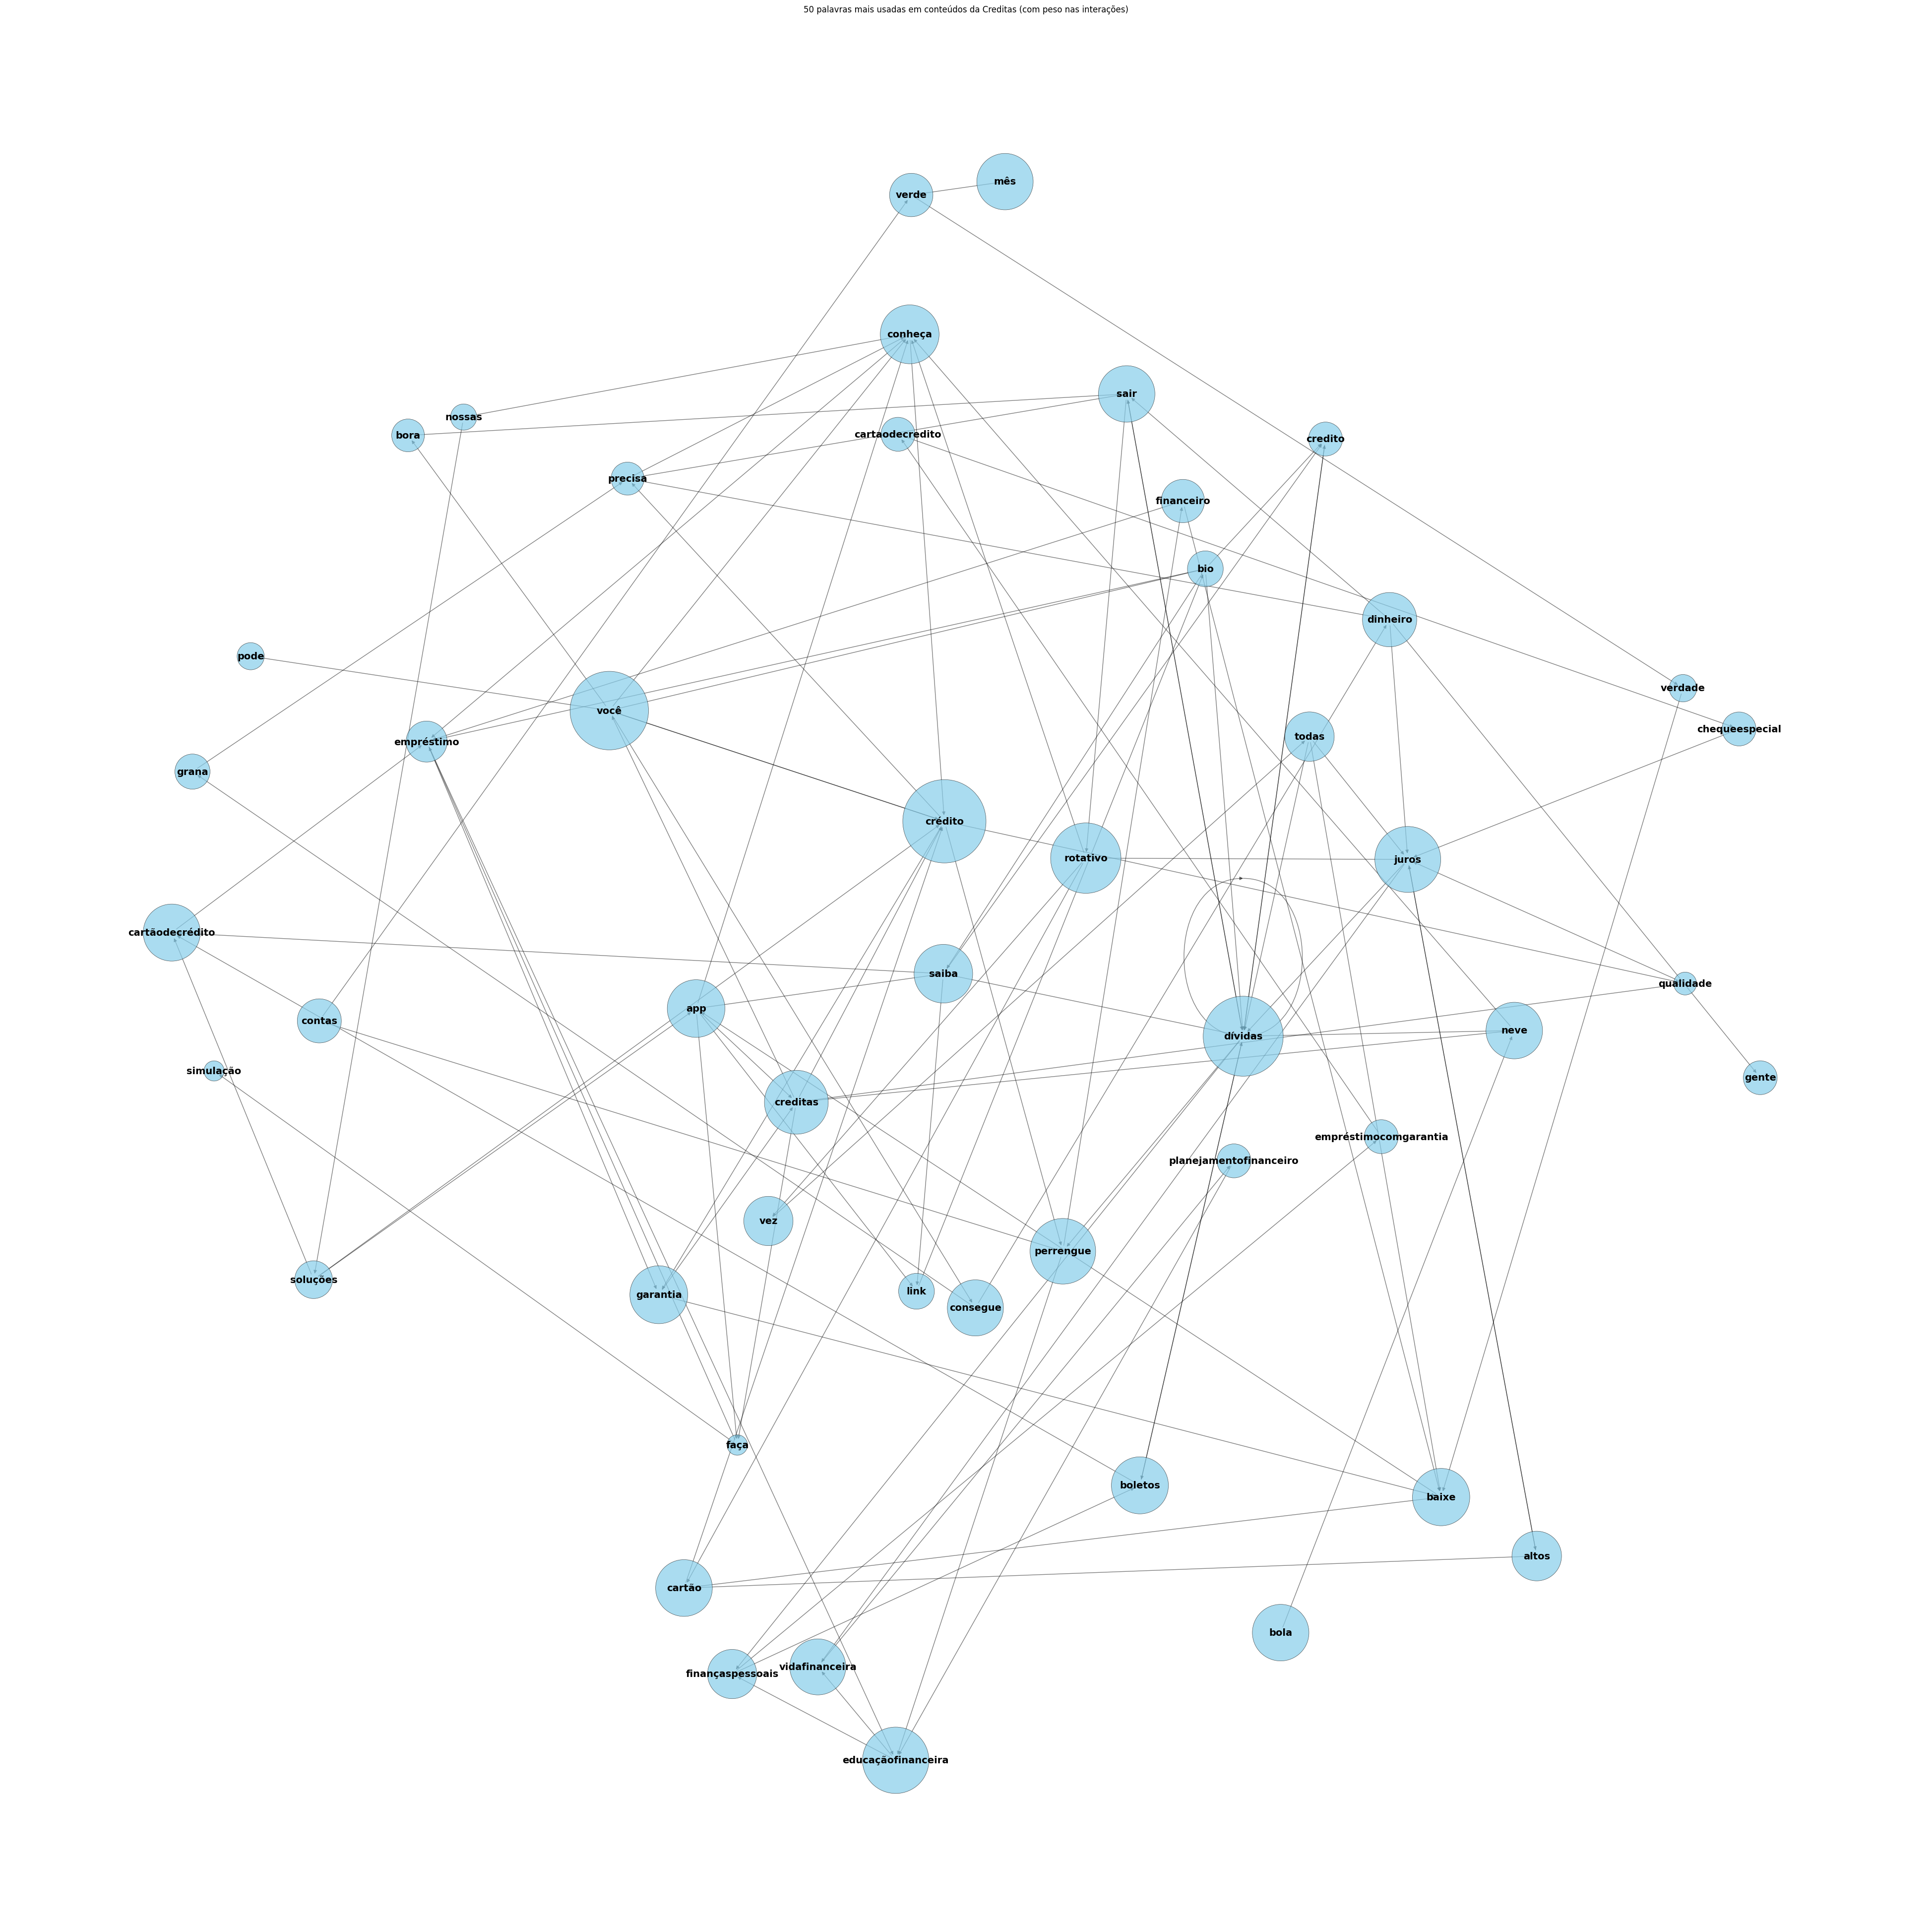

In [57]:
import pandas as pd
import re
from collections import Counter, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# filtering the DataFrame for Creditas content
creditas_df = df[df['marca'] == 'Creditas']

# removing quotation marks from text in 'conteúdo' column
creditas_df['conteúdo'] = creditas_df['conteúdo'].str.replace('"', '').str.replace("'", '')

# joining all text into one large string
all_content = ' '.join(creditas_df['conteúdo'])

# tokenizing text into lowercase words
words = re.findall(r'\w+', all_content.lower())

# defining common Portuguese stopwords
stopwords = {
    'eu', 'tu', 'ele', 'ela', 'nós', 'vós', 'eles', 'as', 'a', 'ao', 'aos', 'as', 'do', 'da', 'dos', 'das',
    'me', 'te', 'se', 'nos', 'lhes', 'meu', 'minha', 'teu', 'tua', 'seu', 'sua', 'nosso', 'nossa', 'deles',
    'delas', 'que', 'quem', 'qual', 'o', 'a', 'e', 'mas', 'como', 'quando', 'onde', 'porque', 'porquê',
    'para', 'sem', 'com', 'entre', 'sobre', 'até', 'apenas', 'muito', 'pouco', 'também', 'mais', 'menos',
    'ainda', 'hoje', 'sempre', 'nunca', 'já', 'só', 'assim', 'talvez', 'isso', 'aquilo', 'aqueles', 'esta',
    'isto', 'aqui', 'ali', 'ou', 'uma', 'por', 'em', 'pra', 'tem', 'na', 'é', 'de', 'os', 'um', 'no', 'aí',
    'ali', 'suas', 'não'
}

# tracking engagement and filtered words
word_interactions = defaultdict(int)
filtered_words = []

# filtering and counting words, excluding stopwords
for index, row in creditas_df.iterrows():
    content_words = re.findall(r'\w+', row['conteúdo'].lower())
    interactions = row['interações']

    for word in content_words:
        if word not in stopwords:
            filtered_words.append(word)
            word_interactions[word] += interactions

# getting the 50 most common words
word_counts = Counter(filtered_words)
most_common_words = dict(word_counts.most_common(50))

# building directed graph for word relationships
G = nx.DiGraph()
for i in range(len(filtered_words) - 1):
    if filtered_words[i] in most_common_words and filtered_words[i + 1] in most_common_words:
        G.add_edge(filtered_words[i], filtered_words[i + 1])

# plotting network with engagement-based node sizing
plt.figure(figsize=(50, 50), facecolor='white')
pos = nx.spring_layout(G, k=1.0, iterations=50)

nx.draw_networkx_nodes(
    G, pos,
    node_size=[word_interactions[word] * 0.2 for word in G.nodes()],
    node_color='skyblue',
    edgecolors='black',
    linewidths=0.5,
    alpha=0.7
)

nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_weight='bold')

# displaying title and show plot
plt.title('50 palavras mais usadas em conteúdos da Creditas (com peso nas interações)')
plt.axis('off')
plt.show()

In [60]:
# preparing a list to store word frequency and engagement data
word_data = []

# calculating total engagement and average engagement
for word, count in most_common_words.items():
    total_interactions = word_interactions.get(word, 0)
    avg_interactions = total_interactions / count if count > 0 else 0

    word_data.append({
        'Word': word,
        'Count': count,
        'Interactions': total_interactions,
        'Average Interactions': avg_interactions
    })

# creating a DataFrame, sort by interactions, and reset index
top_words_df = pd.DataFrame(word_data)
top_words_df = top_words_df.sort_values(by='Interactions', ascending=False).reset_index(drop=True)

print(top_words_df)


                      Word  Count  Interactions  Average Interactions
0                  crédito     24         73085           3045.208333
1                  dívidas     22         67463           3066.500000
2                     você     22         64948           2952.181818
3                 rotativo      5         52198          10439.600000
4       educaçãofinanceira     11         46402           4218.363636
5                    juros     16         45786           2861.625000
6                perrengue      4         45346          11336.500000
7                 creditas     18         42922           2384.555556
8                  conheça     10         36487           3648.700000
9                    saiba      6         36182           6030.333333
10                garantia     12         35319           2943.250000
11                     app     13         35055           2696.538462
12                   baixe     10         34615           3461.500000
13         cartãodec

In [54]:
# interactive scatter plot using average interactions as x-axis and word count as y-axis
fig = px.scatter(
    top_words_df,
    x='Average Interactions',
    y='Count',
    size='Interactions',
    hover_name='Word',
    title="Relação entre Média de Engajamento e Contagem de Palavras",
    labels={'Average Interactions': 'Média de Interações', 'Count': 'Contagem de Palavras'}
)

# hiding spines and adjust aesthetics
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
    margin=dict(l=40, r=40, b=40, t=40),
    showlegend=False
)

# display the interactive plot
fig.show()

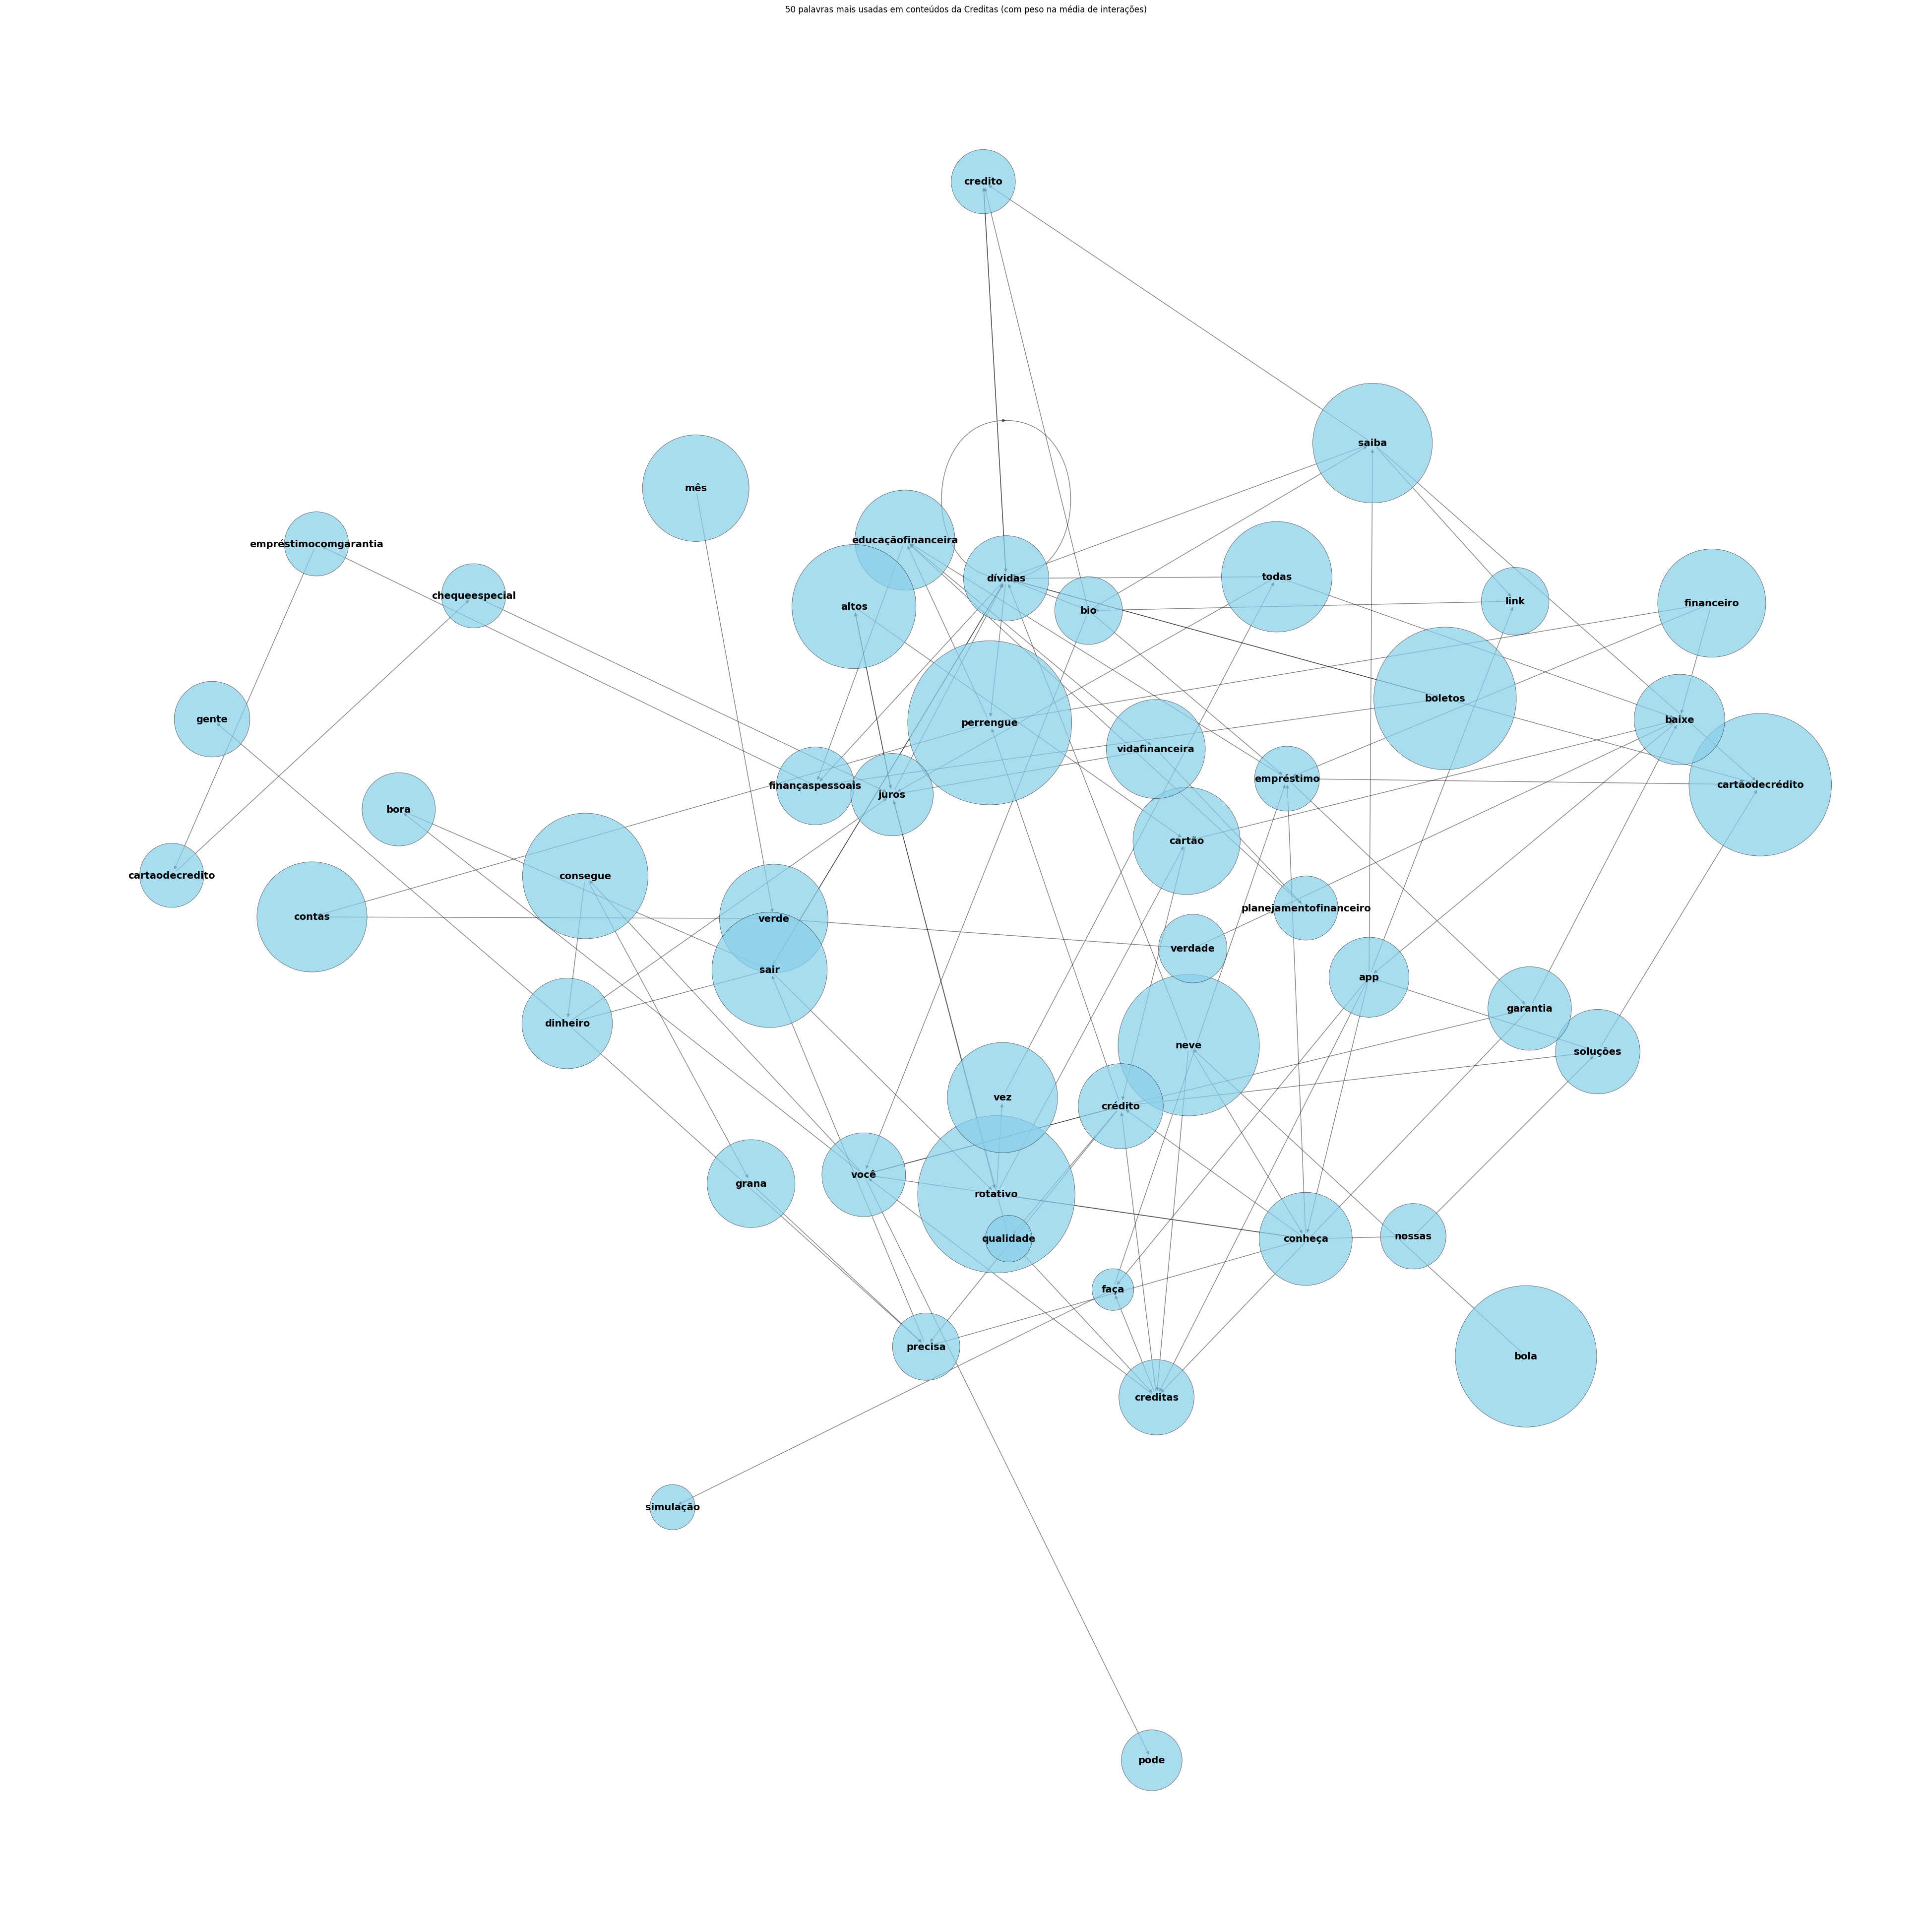

In [55]:
# plotting word network with the node sized by the average engagement
plt.figure(figsize=(50, 50), facecolor='white')
pos = nx.spring_layout(G, k=0.5, iterations=50)

# now the node size is proportional to it's average engagement
nx.draw_networkx_nodes(
    G, pos,
    node_size=[(word_interactions[word] / word_counts[word]) * 5 for word in G.nodes()],
    node_color='skyblue',
    edgecolors='black',
    linewidths=0.5,
    alpha=0.7
)

# formatting edges and labels
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_weight='bold')

# title and final plot
plt.title('50 palavras mais usadas em conteúdos da Creditas (com peso na média de interações)')
plt.axis('off')
plt.show()
